# Классификация автомобилей по силуэтам с помощью ML

## Описание:
Цель проекта — провести анализ данных из набора Statlog Vehicle Silhouettes, который включает различные характеристики автомобилей и предназначен для многоклассовой классификации (4 класса). Задача — классифицировать автомобили с применением различных моделей машинного обучения, включая логистическую регрессию, деревья решений, ансамблевые методы (бэггинг, случайный лес), а также бустинг. В рамках анализа также применяется метод главных компонент (PCA) для снижения размерности данных.

# Шаг 1: Чтение данных и их предварительный анализ

Мы работаем с [набором данных](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), описывая различные автомобили для решения задачи мультиклассовой классификации ($k=4$).

In [250]:
!pip install ucimlrepo
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 


In [251]:
logreg = LogisticRegression()

In [252]:
from ucimlrepo import fetch_ucirepo 
  
# Загрузка набора данных
statlog_vehicle_silhouettes = fetch_ucirepo(id=149)

**Abstract**

In [253]:
print(statlog_vehicle_silhouettes.metadata.abstract)

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects.


**Summary**

In [254]:
print(''.join(statlog_vehicle_silhouettes.metadata.additional_info.summary))

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevation but all angles of rotation.

The rule tree classification performance compared favourably to MDC (Minimum Distance Classifier) and k-NN (k-Nearest Neighbour

**Особенности**

In [255]:
statlog_vehicle_silhouettes.variables

,name,role,type,demographic,description,units,missing_values
0,COMPACTNESS,Feature,Integer,None,None,None,no
1,CIRCULARITY,Feature,Integer,None,None,None,no
2,DISTANCE CIRCULARITY,Feature,Integer,None,None,None,no
3,RADIUS RATIO,Feature,Integer,None,None,None,no
4,PR.AXIS ASPECT RATIO,Feature,Integer,None,None,None,no
5,MAX.LENGTH ASPECT RATIO,Feature,Integer,None,None,None,no
6,SCATTER RATIO,Feature,Integer,None,None,None,no
7,ELONGATEDNESS,Feature,Integer,None,None,None,no
8,PR.AXIS RECTANGULARITY,Feature,Integer,None,None,None,no
9,MAX.LENGTH RECTANGULARITY,Feature,Integer,None,None,None,no


**Данные**

In [257]:
data = statlog_vehicle_silhouettes.data.features 
target = statlog_vehicle_silhouettes.data.targets 

In [258]:
data

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89.0,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106.0,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86.0,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


In [259]:
target

,class
0,van
1,van
2,saab
3,van
4,bus
...,...
841,saab
842,van
843,saab
844,saab


## Шаг 1: Разделение на тренировочные и тестовые данные

In [260]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(data, target, test_size=0.25)

In [261]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(634, 18) (634, 1)
(212, 18) (212, 1)


Методы "describe" и "info" предоставляют некоторую полезную информацию.

In [262]:
X_train.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,633.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000,634.000000
mean,93.808847,44.988959,82.080442,169.123028,62.037855,8.630915,168.602524,41.124606,20.616719,147.883281,188.323344,439.711356,175.036278,72.479495,6.391167,12.458991,188.709779,195.763407
std,8.301848,6.611891,16.049632,34.068382,9.720834,5.079406,33.908432,9.211672,2.698037,15.571136,31.333318,176.586459,33.671683,7.933196,5.607064,9.200714,9.089567,7.382199
min,73.000000,33.000000,36.000000,73.000000,47.000000,2.000000,6.000000,26.000000,17.000000,20.000000,127.000000,184.000000,109.000000,61.000000,0.000000,0.000000,19.000000,181.000000
25%,87.000000,40.000000,70.000000,140.250000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,71.000000,5.500000,11.000000,188.000000,197.000000
75%,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,597.750000,199.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,119.000000,100.000000,112.000000,333.000000,199.000000,73.000000,265.000000,162.000000,40.000000,188.000000,320.000000,1018.000000,401.000000,135.000000,72.000000,41.000000,204.000000,211.000000


In [263]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 477 to 483
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       633 non-null    float64
 1   CIRCULARITY                       634 non-null    int64  
 2   DISTANCE CIRCULARITY              634 non-null    int64  
 3   RADIUS RATIO                      634 non-null    int64  
 4   PR.AXIS ASPECT RATIO              634 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           634 non-null    int64  
 6   SCATTER RATIO                     634 non-null    int64  
 7   ELONGATEDNESS                     634 non-null    int64  
 8   PR.AXIS RECTANGULARITY            634 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         634 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  634 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  634 non-null    int64  
 12  SCALED RADI

## Шаг 2: Предобработка данных

In [264]:
valid_classes = ['opel', 'saab', 'bus', 'van']
invalid_indices = target[~target['class'].isin(valid_classes)].index

In [265]:
invalid_indices

Index([752], dtype='int64')

In [266]:
df_target = target.drop(index=invalid_indices)

In [267]:
df_data = data.drop(index=invalid_indices)
target.loc[752, 'class']

'204'

In [268]:
print(df_data.isnull().sum())

COMPACTNESS                         0
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR.AXIS RECTANGULARITY              0
MAX.LENGTH RECTANGULARITY           0
SCALED VARIANCE ALONG MAJOR AXIS    0
SCALED VARIANCE ALONG MINOR AXIS    0
SCALED RADIUS OF GYRATION           0
SKEWNESS ABOUT MAJOR AXIS           0
SKEWNESS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MAJOR AXIS           0
HOLLOWS RATIO                       0
dtype: int64


Данные не содержали пропусков, что значительно упростило процесс их обработки. Для многоклассовой классификации было решено оставить только 4 класса автомобилей: opel, saab, bus, van. Затем были удалены записи, которые не принадлежат этим классам.

## Шаг 3: Логистическая регрессия

1. Найдем оптимальные гиперпараметры для логистической регрессии с перекрестной проверкой на данных поезда (достаточно поиска по небольшой сетке, нет необходимости искать наилучшие параметры)
2. Оценим качество модели с помощью f1 и показателей точности
3. Построим ROC-кривую для обученной модели

In [269]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
pca = decomposition.PCA()
logistic_Reg = linear_model.LogisticRegression()

In [270]:
X_train, X_val, y_train, y_val = train_test_split(df_data, df_target, test_size=0.25)
logreg_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1_weighted')

In [271]:
best_params = grid_search.best_params_
best_params

{'C': 1, 'penalty': 'l1'}

In [272]:
# Лучшие гиперпараметры и финальная модель
best_params.update({'multi_class': 'multinomial', 'solver': 'saga'})
best_logreg_model = LogisticRegression(**best_params)
best_logreg_model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, multi_class='multinomial', penalty='l1', solver='saga')

In [273]:
# Оценка на тестовых данных
y_pred = best_logreg_model.predict(X_val)

In [274]:
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
print("Оценка точности: ", accuracy)
print("Оценка F1: ", f1)

Оценка точности:  0.6745283018867925
Оценка F1:  0.6499463701103195


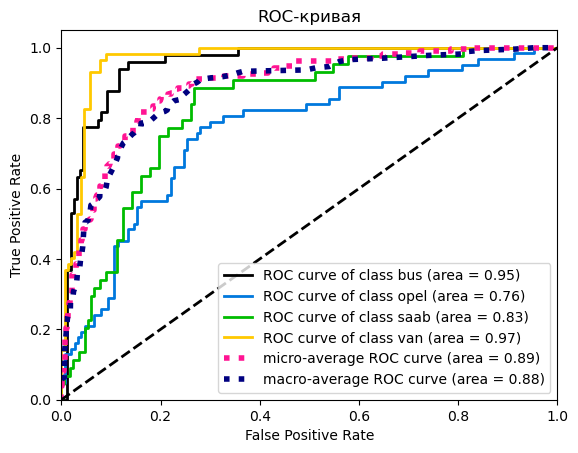

In [275]:
import scikitplot as skplt
y_probas = best_logreg_model.predict_proba(X_val)
skplt.metrics.plot_roc(y_val, y_probas)
plt.title('ROC-кривая')
plt.show()

Логистическая регрессия с настройкой гиперпараметров с помощью GridSearchCV показала точность 67.5% и F1-оценку 64.9%. Это базовая модель, которая показала относительно хорошие результаты на валидационном наборе.
Высокий показатель площадь под ROC-кривой (AUC) указывает на то, что модель хорошо различает классы, даже если её точность и F1-оценка могут быть средними. В нашем случае, это говорит о том, что модель логистической регрессии, несмотря на несколько более низкие показатели точности, хорошо справляется с классификацией на уровне вероятностей.

## Шаг 4: Применение метода главных компонент (PCA)

Применим PCA к обучающей части данных и построим график объясняемой дисперсии.

In [276]:
# Применяем PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

In [277]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

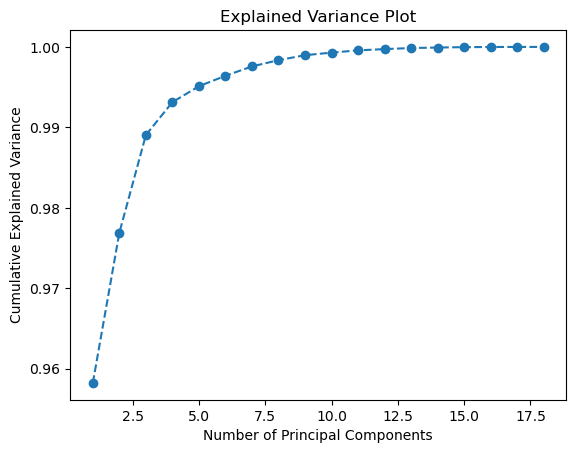

In [278]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Plot')
plt.show()

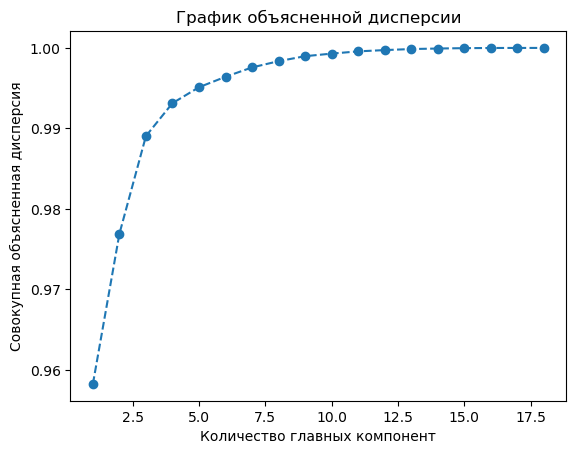

In [279]:
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Количество главных компонент')
plt.ylabel('Совокупная объясненная дисперсия')
plt.title('График объясненной дисперсии')
plt.show()

Применение метода главных компонент (PCA) позволило снизить размерность данных, но качество модели слегка ухудшилось: точность снизилась до 66.5%, а F1-оценка до 63.7%. PCA помогло уменьшить количество признаков, но не улучшило качество модели.

## Шаг 5. Преобразование PCA

На графике выше видно, что при 10 компонентах объясняется около 98% дисперсии, что означает, что для большинства информации в данных достаточно всего 10 компонент вместо всех исходных признаков.

In [280]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

## Шаг 6: Логистическая регрессия на данных после PCA

После применения PCA снова обучим модель логистической регрессии на преобразованных данных, оценим её качество и построим ROC-кривую.

In [281]:
param_grid_pca = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logreg_model_pca = LogisticRegression(multi_class='multinomial', solver='saga')
grid_search_pca = GridSearchCV(logreg_model_pca, param_grid_pca, cv=5, scoring='f1_weighted')
grid_search_pca.fit(X_train_pca, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1_weighted')

In [282]:
best_params_pca = grid_search_pca.best_params_

In [283]:
best_logreg_model_pca = LogisticRegression(**best_params_pca, multi_class='multinomial', solver='saga')
best_logreg_model_pca.fit(X_train_pca, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', penalty='l1', solver='saga')

In [284]:
# Сделаем предсказания на валидационном наборе
y_pred_dt = best_dt_model.predict(X_val)

In [285]:
print("Лучшие параметры после PCA: ", grid_search_pca.best_params_)

Лучшие параметры после PCA:  {'C': 10, 'penalty': 'l1'}


In [286]:
# Сделаем предсказания на валидационном наборе
y_pred_pca = best_logreg_model_pca.predict(X_val_pca)

In [287]:
# Оценим качество модели
accuracy_pca = accuracy_score(y_val, y_pred_pca)
f1_pca = f1_score(y_val, y_pred_pca, average='weighted')

print(f'Accuracy after PCA: {accuracy_pca:.4f}')
print(f'F1 Score after PCA: {f1_pca:.4f}')

Accuracy after PCA: 0.6651
F1 Score after PCA: 0.6373


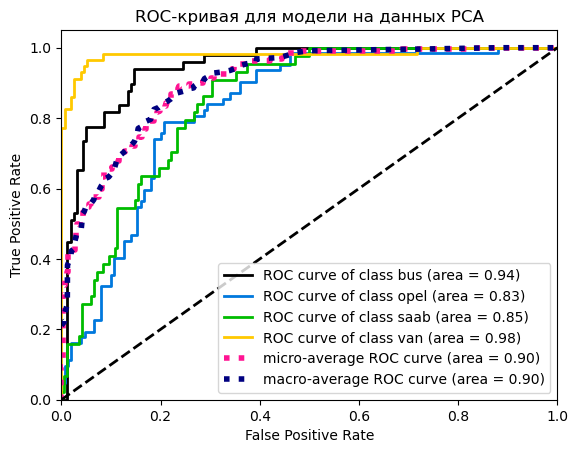

In [288]:
# Построим ROC-кривую для модели на данных PCA
y_probas_pca = best_logreg_model_pca.predict_proba(X_val_pca)
skplt.metrics.plot_roc(y_val, y_probas_pca)
plt.title('ROC-кривая для модели на данных PCA')
plt.show()

Из графика видно что площади не значительно изменились.

## Шаг 7: Дерево решений

Теперь создаем дерево решений на основе тех же данных. Найдем оптимальные параметры дерева, используя перекрестную проверку и измерим качество модели, используя те же показатели, которые использовались выше.

In [289]:
from sklearn.tree import DecisionTreeClassifier

# Выполним поиск по сетке для дерева решений
param_grid_dt = {'max_depth': [None, 5, 10, 15, 20]}
dt_model = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='f1_weighted')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20]},
             scoring='f1_weighted')

In [290]:
# Получим оптимальные гиперпараметры
best_params_dt = grid_search_dt.best_params_

In [291]:
# Обучим модель с оптимальными гиперпараметрами
best_dt_model = DecisionTreeClassifier(**best_params_dt)
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [292]:
# Сделаем предсказания на валидационном наборе
y_pred_dt = best_dt_model.predict(X_val)

In [293]:
# Оценим качество модели
accuracy_dt = accuracy_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt, average='weighted')

print(f'Accuracy for Decision Tree: {accuracy_dt:.4f}')
print(f'F1 Score for Decision Tree: {f1_dt:.4f}')

Accuracy for Decision Tree: 0.7453
F1 Score for Decision Tree: 0.7440


Модель дерева решений с оптимальными параметрами показала лучшие результаты: точность 74.5% и F1-оценка 74.4%. Это значительное улучшение по сравнению с логистической регрессией.

## Шаг 8: Бэггинг

Здесь начинается этап создания ансамбля.

Сначала мы будем использовать метод создания пакетов. Создадим ансамбль из 𝑁
  алгоритмов, изменяющих N от 𝑁𝑚𝑖𝑛=2
  до 𝑁𝑚𝑎𝑥=100
  (с шагом 5).

Мы построим два ансамбля: логистических регрессий и деревьев решений.

In [294]:
from sklearn.ensemble import BaggingClassifier

# Ансамбль логистических регрессий
f1_scores_bagging_logreg = []
accuracy_scores_bagging_logreg = []

In [295]:
# Ансамбль деревьев решений
f1_scores_bagging_dt = []
accuracy_scores_bagging_dt = []

In [296]:
ensemble_sizes = range(1, 101, 5)

In [297]:
for n_estimators in ensemble_sizes:
    # Логистические регрессии
    bagging_logreg = BaggingClassifier(base_estimator=LogisticRegression(**best_params), n_estimators=n_estimators)
    bagging_logreg.fit(X_train, y_train)
    y_pred_bagging_logreg = bagging_logreg.predict(X_val)
    accuracy_bagging_logreg = accuracy_score(y_val, y_pred_bagging_logreg)
    f1_bagging_logreg = f1_score(y_val, y_pred_bagging_logreg, average='weighted')
    accuracy_scores_bagging_logreg.append(accuracy_bagging_logreg)
    f1_scores_bagging_logreg.append(f1_bagging_logreg)  
# Деревья решений
    bagging_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(**best_params_dt), n_estimators=n_estimators)
    bagging_dt.fit(X_train, y_train)
    y_pred_bagging_dt = bagging_dt.predict(X_val)
    accuracy_bagging_dt = accuracy_score(y_val, y_pred_bagging_dt)
    f1_bagging_dt = f1_score(y_val, y_pred_bagging_dt, average='weighted')
    accuracy_scores_bagging_dt.append(accuracy_bagging_dt)
    f1_scores_bagging_dt.append(f1_bagging_dt)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimat

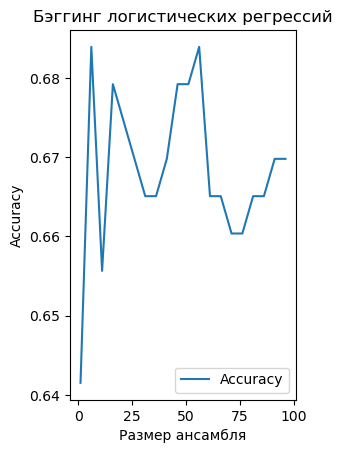

In [298]:
# График для логистических регрессий
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, accuracy_scores_bagging_logreg, label='Accuracy')
plt.title('Бэггинг логистических регрессий')
plt.xlabel('Размер ансамбля')
plt.ylabel('Accuracy')
plt.legend()

График показывает, что оптимальное количество моделей достигается в районах 10 и 60.

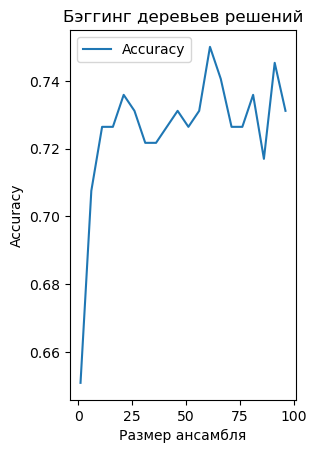

In [299]:
# График для деревьев решений
plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores_bagging_dt, label='Accuracy')
plt.title('Бэггинг деревьев решений')
plt.xlabel('Размер ансамбля')
plt.ylabel('Accuracy')
plt.legend()

# Вывод графика
plt.show()

Оптимальное количество моделий для деревьев достигается в районе 60.

Использование бэггинга для логистической регрессии и дерева решений улучшило стабильность моделей, но наибольшие улучшения наблюдались у деревьев решений. Точность ансамбля деревьев решений продолжила улучшаться с увеличением числа деревьев.



## Шаг 9: Random Forest

Теперь мы будем работать со случайным лесом (его реализацией sklearn). Построим графики значений "f1" и "accuracy", отражающие количество деревьев в Случайном лесу.

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

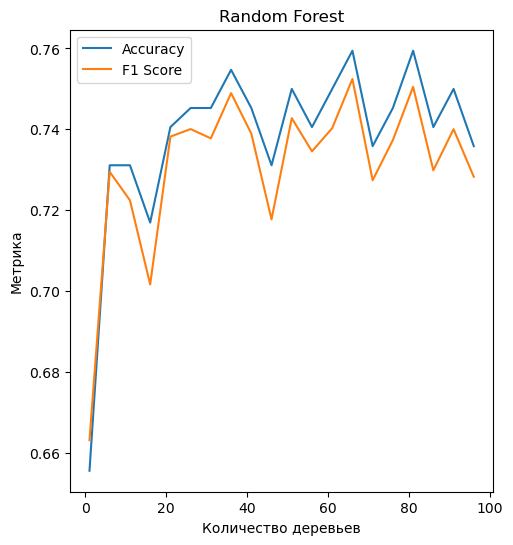

In [300]:
# Задача 9: Random Forest
from sklearn.ensemble import RandomForestClassifier

# Random Forest
f1_scores_rf = []
accuracy_scores_rf = []

n_trees_list = range(1, 101, 5)

for n_trees in n_trees_list:
    rf_model = RandomForestClassifier(n_estimators=n_trees)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_val)
    accuracy_rf = accuracy_score(y_val, y_pred_rf)
    f1_rf = f1_score(y_val, y_pred_rf, average='weighted')
    accuracy_scores_rf.append(accuracy_rf)
    f1_scores_rf.append(f1_rf)

# Построим графики
plt.figure(figsize=(12, 6))

# График для Random Forest
plt.subplot(1, 2, 1)
plt.plot(n_trees_list, accuracy_scores_rf, label='Accuracy')
plt.plot(n_trees_list, f1_scores_rf, label='F1 Score')
plt.title('Random Forest')
plt.xlabel('Количество деревьев')
plt.ylabel('Метрика')
plt.legend()


Из графика видно что оптимальное количество деревьев достигается на отметке около 40, и дальше, с ростом количества, значительного роста не наблюдается.

## Шаг 10: Кривая обучения
Наша цель - оценить, как меняется поведение модели с увеличением размера набора данных для обучения.

Разделим обучающие данные на 10 равных (почти) частей. Затем обучим модели из приведенных выше (логистическая регрессия, дерево выбора, случайный лес) с оптимальными гиперпараметрами, которые мы выбрали для 1 части, 2 частей (объединив их, чтобы размер цепочки увеличился в 2 раза), 3 частей и так далее.

Построим график оценок "точность" и "f1" для части "val", изменяя размер набора данных "train" (таким образом, оси будут соответствовать размеру набора данных "оценка").

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

In [302]:
# Функция для обучения модели и расчета метрик
def train_and_score(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    return accuracy, f1

In [303]:
train_sizes = np.linspace(0.1, 1.0, 10)

In [304]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

num_parts = 10

kf = KFold(n_splits=num_parts, shuffle=True, random_state=42)

train_sizes = []
accuracy_scores_logreg = []
f1_scores_logreg = []
accuracy_scores_tree = []
f1_scores_tree = []
accuracy_scores_rf = []
f1_scores_rf = []

# Цикл по различным размерам обучающей выборки
for train_index, _ in kf.split(X_train):
    X_train_part, y_train_part = X_train.iloc[train_index], y_train.iloc[train_index]

    # Логистическая регрессия
    logreg.fit(X_train_part, y_train_part)
    y_val_pred_logreg = logreg.predict(X_val)
    accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
    f1_logreg = f1_score(y_val, y_val_pred_logreg, average='weighted')
    accuracy_scores_logreg.append(accuracy_logreg)
    f1_scores_logreg.append(f1_logreg)

    # Дерево решений
    dt_model.fit(X_train_part, y_train_part)
    y_val_pred_tree = dt_model.predict(X_val)
    accuracy_tree = accuracy_score(y_val, y_val_pred_tree)
    f1_tree = f1_score(y_val, y_val_pred_tree, average='weighted')
    accuracy_scores_tree.append(accuracy_tree)
    f1_scores_tree.append(f1_tree)

    # Случайный лес
    rf_model.fit(X_train_part, y_train_part)
    y_val_pred_rf = rf_model.predict(X_val)
    accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
    f1_rf = f1_score(y_val, y_val_pred_rf, average='weighted')
    accuracy_scores_rf.append(accuracy_rf)
    f1_scores_rf.append(f1_rf)

    # Запись размера обучающей выборки
    train_sizes.append(len(train_index))



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

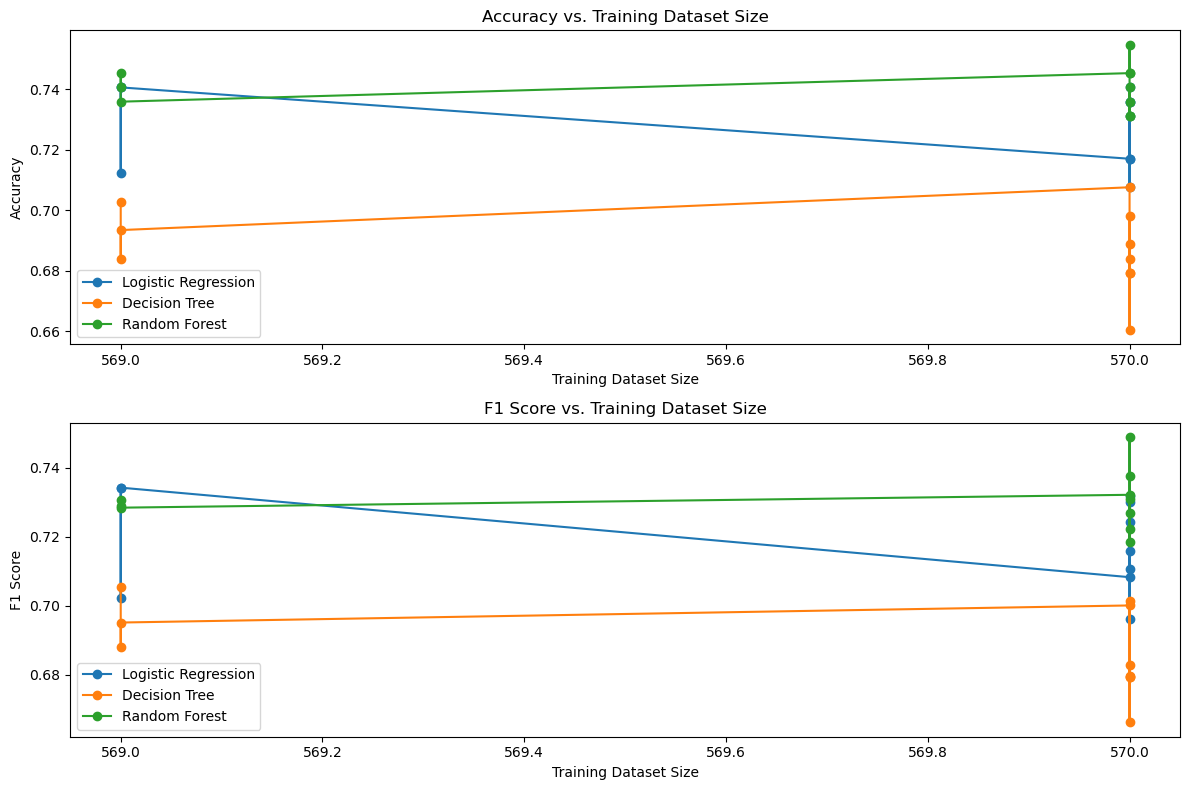

In [305]:
# Построение графиков результатов
plt.figure(figsize=(12, 8))

# График для точности
plt.subplot(2, 1, 1)
plt.plot(train_sizes, accuracy_scores_logreg, label='Logistic Regression', marker='o')
plt.plot(train_sizes, accuracy_scores_tree, label='Decision Tree', marker='o')
plt.plot(train_sizes, accuracy_scores_rf, label='Random Forest', marker='o')
plt.title('Accuracy vs. Training Dataset Size')
plt.xlabel('Training Dataset Size')
plt.ylabel('Accuracy')
plt.legend()

# График для F1-оценки
plt.subplot(2, 1, 2)
plt.plot(train_sizes, f1_scores_logreg, label='Logistic Regression', marker='o')
plt.plot(train_sizes, f1_scores_tree, label='Decision Tree', marker='o')
plt.plot(train_sizes, f1_scores_rf, label='Random Forest', marker='o')
plt.title('F1 Score vs. Training Dataset Size')
plt.xlabel('Training Dataset Size')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

    1. Decision Tree отстает от других моделей, особенно на небольших объемах данных, и требует большого количества данных для улучшения, но даже при этом оно не показывает лучших результатов.
    2. Random Forest медленно улучшает производительность с увеличением данных и становится лучшей моделью по точности на большом объеме данных, но по F1-оценке все еще отстает от Logistic Regression.
    3. Logistic Regression хорошо работает на небольших наборах данных, но теряет точность на больших объемах, хотя она все еще показывает хорошую F1-оценку, что свидетельствует о балансе между точностью и полнотой.

## Шаг 11: Boosting

Создадим бустинг-ансамбль, используя пакет Cash Boost, Lightgbm или xgboost.
Найдем оптимальное количество деревьев решений в расширяющем наборе, используя поиск по сетке.

In [306]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [307]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200]}

xgb_model = xgb.XGBClassifier(objective='multi:softprob', num_class=len(set(y_train_encoded)))

grid_search = GridSearchCV(xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=4,
                                     num_parallel_tree=None, ...),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [308]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_estimators': 200}


In [309]:
optimal_n_estimators = grid_search.best_params_['n_estimators']
final_xgb_model = xgb.XGBClassifier(objective='multi:softprob', num_class=len(set(y_train)), n_estimators=optimal_n_estimators) 

In [310]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on Validation Set:", accuracy)

Accuracy on Validation Set: 0.6745283018867925


Использование XGBoost с оптимальными параметрами дало аналогичные результаты с точностью около 67.5%. Модель бустинга показала устойчивую производительность, но не смогла значительно превзойти дерево решений.